In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('global_power_plant_database.csv')


print(df.head())

  country country_long                                              name  \
0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan                                      Kandahar DOG   
2     AFG  Afghanistan                                      Kandahar JOL   
3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   

  other_fuel2  ... estimated_generation_gwh_2013  \
0         NaN  ...    

/var/folders/s1/j1lr__816ks_mg4_h_l5z27h0000gn/T/ipykernel_79585/3250384876.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('global_power_plant_database.csv')


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

In [25]:
df.duplicated().sum()

0

In [26]:
df.isnull().sum()

country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277


In [27]:
# Базовая проверка
df.head(), df.info(), df.isna().sum().sort_values(ascending=False)

# Приведение типов (числовые колонки → числа; всё, что не число — станет NaN)
num_cols = [
    "capacity_mw", "latitude", "longitude", "commissioning_year",
    "generation_gwh_2013", "generation_gwh_2014", "generation_gwh_2015"
]
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Чистка текстовых полей (обрезать пробелы; унифицировать регистр)
cat_cols = ["country", "country_long", "name", "primary_fuel", "other_fuel1", "owner"]
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].astype("string").str.strip()

# Работа с пропусками — пример стратегии:
#  • координаты/мощность критичны → строки без них можно удалить
#  • генерацию по годам можно оставить с NaN (понадобится маскировка при расчетах)
df = df.dropna(subset=["latitude", "longitude", "capacity_mw"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

In [28]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,34936.000000,34936.000000,34936.000000,17447.000000,14887.000000,6417.000000,7226.000000,8203.000000,9144.000000,9500.000000,9637.000000,9659.000000,16120.000000,16503.000000,17050.000000,17570.000000,33138.000000
mean,163.355148,32.816637,-6.972803,1997.414823,2018.218849,592.696107,656.863891,762.368840,693.149763,661.834161,517.320785,423.922436,239.112221,242.431122,235.866067,235.695265,716.443378
std,489.636072,22.638603,78.405850,23.397835,1.606428,2174.833482,2231.464288,2533.459828,2404.516759,2369.296957,1975.302686,1698.506485,1191.258172,1285.798297,1267.005223,1259.559841,2484.361200
min,1.000000,-77.847000,-179.977700,1896.000000,2000.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000,1.120000,0.870000,0.440000,0.300000,0.000000
25%,4.900000,29.256475,-77.641550,1988.000000,2017.000000,1.947000,2.260000,2.664500,2.729000,2.467000,2.242000,2.751500,8.620000,8.680000,8.380000,8.322500,8.180000
50%,16.745000,39.727750,-2.127100,2007.000000,2019.000000,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000,27.620000,28.250000,26.830000,27.555000,37.590000
75%,75.344250,46.263125,49.502675,2014.000000,2019.000000,199.706000,226.322250,285.862583,249.866750,214.505150,151.117000,122.781498,106.805000,106.980000,103.120000,107.237500,229.565000
max,22500.000000,71.292000,179.388700,2020.000000,2019.000000,50834.000000,32320.917000,37433.607000,32377.477000,36448.643000,35136.000000,31920.368000,48675.060000,58470.770000,57113.350000,60859.730000,82810.770000


In [29]:
# Ключевая статистика по числовым
desc = df[num_cols].describe().T  # count/mean/std/min/…
print(desc[["mean","50%","std"]])  # среднее, медиана, стд

# Распределение по странам и типам топлива
by_country = df["country"].value_counts()
by_fuel = df["primary_fuel"].value_counts()

                            mean         50%          std
capacity_mw           163.355148    16.74500   489.636072
latitude               32.816637    39.72775    22.638603
longitude              -6.972803    -2.12710    78.405850
commissioning_year   1997.414823  2007.00000    23.397835
generation_gwh_2013   592.696107    23.42600  2174.833482
generation_gwh_2014   656.863891    23.60850  2231.464288
generation_gwh_2015   762.368840    26.14200  2533.459828


In [30]:
# Групповые метрики
cap_stats = df.groupby("primary_fuel")["capacity_mw"].agg(["count","mean","median","std"]).sort_values("mean", ascending=False)

# Пример «гипотезы»: средняя мощность у Gas > у Coal (меняй пары под свою задачу)
g1 = df.loc[df["primary_fuel"]=="Gas", "capacity_mw"].dropna()
g2 = df.loc[df["primary_fuel"]=="Coal","capacity_mw"].dropna()

# Если SciPy не используем — сравним бутстрэпом разницу средних (NumPy-версия)
rng = np.random.default_rng(42)
obs = g1.mean() - g2.mean()
B = 5000
boot = []
pool = np.concatenate([g1.values, g2.values])
n1 = len(g1)
for _ in range(B):
    rng.shuffle(pool)
    boot.append(pool[:n1].mean() - pool[n1:].mean())
p_value = (np.abs(boot) >= np.abs(obs)).mean()
print({"diff_mean": obs, "p≈": p_value})
# p≈ < 0.05 → различие средних статистически значимо (на уровне 5%)


{'diff_mean': -470.13045292964415, 'p≈': 0.0}


In [31]:
# Групповые метрики
cap_stats = df.groupby("primary_fuel")["capacity_mw"].agg(["count","mean","median","std"]).sort_values("mean", ascending=False)

# Пример «гипотезы»: средняя мощность у Gas > у Coal (меняй пары под свою задачу)
g1 = df.loc[df["primary_fuel"]=="Gas", "capacity_mw"].dropna()
g2 = df.loc[df["primary_fuel"]=="Coal","capacity_mw"].dropna()

# Если SciPy не используем — сравним бутстрэпом разницу средних (NumPy-версия)
rng = np.random.default_rng(42)
obs = g1.mean() - g2.mean()
B = 5000
boot = []
pool = np.concatenate([g1.values, g2.values])
n1 = len(g1)
for _ in range(B):
    rng.shuffle(pool)
    boot.append(pool[:n1].mean() - pool[n1:].mean())
p_value = (np.abs(boot) >= np.abs(obs)).mean()
print({"diff_mean": obs, "p≈": p_value})
# p≈ < 0.05 → различие средних статистически значимо (на уровне 5%)


{'diff_mean': -470.13045292964415, 'p≈': 0.0}


In [32]:
# 'commissioning_year' → целое (год); тренд по вводимой мощности
yearly = (
    df.dropna(subset=["commissioning_year"])
      .assign(commissioning_year=lambda x: x["commissioning_year"].astype(int))
      .groupby("commissioning_year")["capacity_mw"].sum()
)

# Как менялась доля типов топлива по годам
mix = (
    df.dropna(subset=["commissioning_year","primary_fuel"])
      .assign(commissioning_year=lambda x: x["commissioning_year"].astype(int))
      .groupby(["commissioning_year","primary_fuel"])["capacity_mw"].sum()
      .groupby(level=0).apply(lambda s: s / s.sum())  # доля от общей мощности по году
      .reset_index(name="share")
)


ValueError: cannot insert commissioning_year, already exists

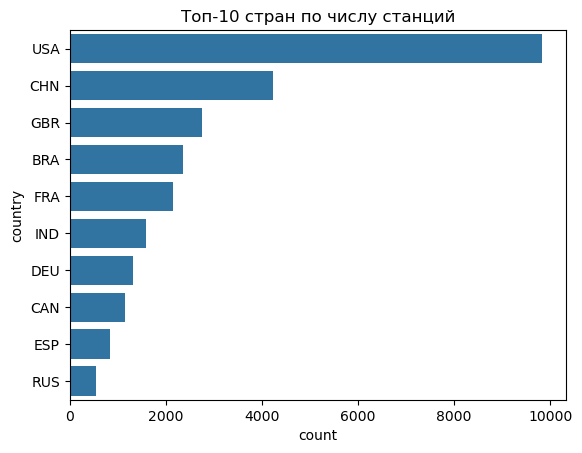

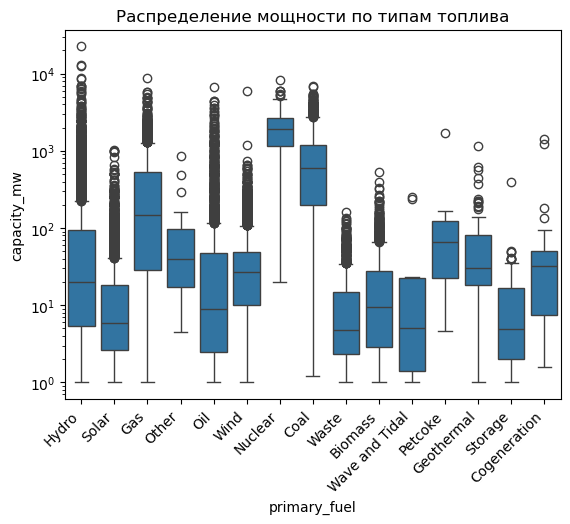

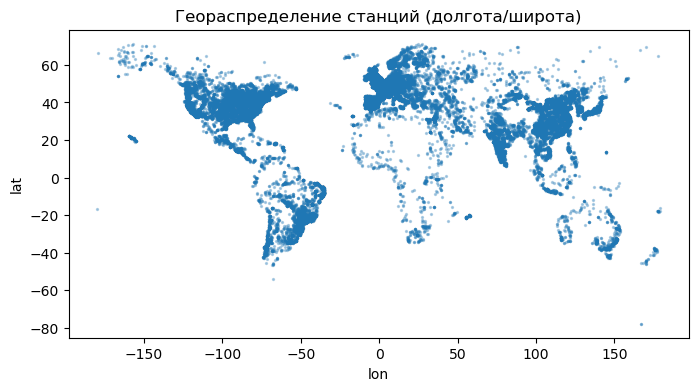

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Топ-10 стран по числу станций
top_countries = df["country"].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Топ-10 стран по числу станций"); plt.xlabel("count"); plt.ylabel("country")
plt.show()

# Мощность по типу топлива (ящики: удобно видеть разброс/выбросы)
sns.boxplot(data=df, x="primary_fuel", y="capacity_mw")
plt.xticks(rotation=45, ha="right"); plt.yscale("log")  # лог-масштаб, т.к. есть очень крупные станции
plt.title("Распределение мощности по типам топлива"); plt.show()

# Географическая карта-рассеяние (быстрый набросок)
plt.figure(figsize=(8,4))
plt.scatter(df["longitude"], df["latitude"], s=2, alpha=0.3)
plt.title("Геораспределение станций (долгота/широта)"); plt.xlabel("lon"); plt.ylabel("lat")
plt.show()


In [ ]:
# Пример матрицы признаков: [capacity_mw, latitude, longitude, one-hot(fuel) первые K типов]
K = 5  # возьмём 5 самых частых типов
top_fuels = df["primary_fuel"].value_counts().head(K).index
X = np.column_stack([
    df["capacity_mw"].to_numpy(),
    df["latitude"].to_numpy(),
    df["longitude"].to_numpy(),
] + [ (df["primary_fuel"]==f).astype(int).to_numpy() for f in top_fuels ])

# Ковариации (центрируем признаки по столбцам)
Xc = X - X.mean(axis=0, keepdims=True)
C = Xc.T @ Xc / (Xc.shape[0] - 1)
evals, evecs = np.linalg.eig(C)


In [ ]:
# Быстрый булев фильтр в NumPy, потом обратно в Pandas
arr = df[["capacity_mw","latitude","longitude"]].to_numpy()
mask = (arr[:,0] > 100) & (arr[:,1].between(-60,60))  # мощные станции в «умеренных» широтах
subset = df.loc[mask]

# Визуализация подмножества
plt.scatter(subset["longitude"], subset["latitude"], s=5, alpha=0.4)
plt.title("Станции >100 MW в умеренных широтах"); plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'between'